# __Image Preparation For A Convolutional Neural Network With TensorFlow's Keras API__

# Topics Covered
- Image processing
- Building and training CNNs
- Using CNNs for inference

### __Our goal over the next few episodes will be to build and train a CNN that can accurately identify images of cats and dogs__

<font color="yellow">__Step 1) Obtain The Data__</font> <br>
<font color="yellow">__Step 2) Organize The Data__</font> <br>
<font color="yellow">__Step 3) Process The Data__</font> <br>
<font color="yellow">__Step 4) Visualize The Data__</font> <br>

For Details, visit [Deep Lizard's Website](https://deeplizard.com/learn/video/LhEMXbjGV_4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

import PIL
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob

# <font color="yellow">__Step 1) Obtain The Data__</font> <br>
The data set we’ll use is a random subset of the data set from the [Kaggle Dogs Versus Cats](https://kaggle.com/c/dogs-vs-cats/data) competition
___

# <font color="yellow">__Step 2) Organize The Data__</font> <br>
After downloading the dataset, its extraction and placement can be done by refering to [deeplizard's official website](https://deeplizard.com/learn/video/LhEMXbjGV_4)

## <font color="orange">Below script moves 1000 samples into the training set, 200 samples into the validation set, and 100 samples into the test set</font>

In [2]:
# Organize data into train, valid, test dirs
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

___
# <font color="yellow">__Step 3) Process The Data__</font>
## <font color="orange">We use <font color="red">Keras' ImageDataGenerator class</font> to create batches of data from the train, valid, and test directories</font>

- <font color="green">___ImageDataGenerator.flow_from_directory()___</font> creates a __DirectoryIterator__, which generates batches of normalized tensor image data from the respective data directories
- Notice, to ImageDataGenerator for each of the data sets, we specify <font color="green">preprocessing_function=tf.keras.applications.vgg16.preprocess_input</font>. For now, just understand this does an additional processing step on the images
- To <font color="green">flow_from_directory()</font>, we first specify the path for the data
- We then specify the target_size of the images, which will resize all images to the specified size, which is determined by the input size that the neural network expects
- The <font color="green">classes</font> parameter expects a list that contains the underlying class names
- And lastly, we specify the <font color="green">batch_size</font>

> We also specify <font color="green">shuffle=False</font> only for test_batches. That's because, later when we plot the evaluation results from the model to a confusion matrix, we'll need to able<br>
> to access the unshuffled labels for the test set. <font color="green">By default, the data sets are shuffled</font>.

- Note, in the case where you do not know the labels for the test data, you will need to modify the test_batches variable. <br>
- Specifically, the change will be to set the parameters <font color="green">classes = None</font> & <font color="green">class_mode = None</font> in flow_from_directory().

In [3]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


___
# <font color="yellow">__Step 4) Visualize The Data__</font>
We now call <font color="red">next(train_batches)</font> to generate a batch of images and labels from the training set. 

In [5]:
imgs, labels = next(train_batches)

## <font color="orange">We then use this plotting function obtained from TensorFlow's documentation to plot the processed images within our Jupyter notebook</font>

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

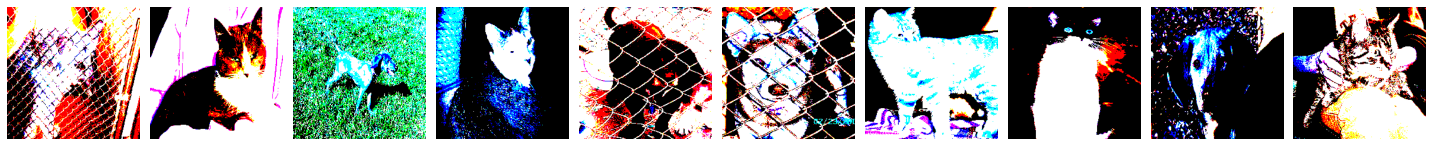

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [7]:
plotImages(imgs)

print(labels)

- This is what the first processed random batch from the training set looks like.
- Notice that the color appears to be distorted. This has to do with the VGG16 processing we applied to the data sets
- This is because RGB pixel data has been processed in such a way that the image data now looks like this before being passed to the network
- Note that dogs are represented with the one-hot encoding of [0,1], and cats are represented by [1,0]
___

# <font color="green">__Creating And Train A CNN Image Classifier With Keras__</font>

# <font color="yellow">__Step 1) Build A Simple CNN__</font>


- The first layer in the model is a <font color="green">2-dimensional convolutional layer</font>
- This layer will have <font color="green">32 output filters</font> each with a <font color="green">kernel size of 3x3, both arbitary
- And we’ll use the <font color="green">relu activation function</font>
- We enable zero-padding by specifying <font color="green">padding = 'same'</font>
- Our images are 224 pixels high and 224 pixels wide and have 3 color channels: RGB, thus an <font color="green">input_shape of (224,224,3)
- We then add a <font color="green">max pooling layer to pool and reduce the dimensionality</font> of the data
> All above detail explanation [available](https://deeplizard.com/learn/playlist/PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU) <br>

- We follow this by <font color="green">adding another convolutional layer</font> with the exact specs as the earlier one, except for this second Conv2D layer has 64 filters
- The choice of 64 here is again arbitrary, but the general choice of having more filters in later layers than in earlier ones is common
- This layer is again followed by the same type of <font color="green">MaxPool2D layer</font>
- We then <font color="green">Flatten</font> the output from the convolutional layer and pass it to a <font color="green">Dense layer</font>
- Dense layer is the <font color="green">output layer</font> of the network, and so it has <font color="green">2 nodes</font>, one for cat and one for dog
- We’ll use the <font color="green">softmax activation function</font> on our output so that the output for each sample is a probability distribution over the outputs of cat and dog


In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])
model.summary()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

## <font color="orange">Now that the model is built, we <font color="green">___compile</font> the model using the <font color="green">Adam optimizer___</font> with a <font color="green">___learning rate of 0.0001___</font>, a loss of <font color="green">___categorical_cross_entropy___</font>, and we’ll look at <font color="green">___accuracy___</font> as our performance metric</font>

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# <font color="yellow">__Step 3) Train A Simple CNN__</font>
### <font color="orange">We'll be passing in our newly introduced DirectoryIterators train_batches and valid_batches to train and validate the model</font>

In [11]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 39s - loss: 19.7905 - accuracy: 0.5500 - val_loss: 7.6015 - val_accuracy: 0.6150
Epoch 2/10
100/100 - 37s - loss: 3.4176 - accuracy: 0.7330 - val_loss: 3.2503 - val_accuracy: 0.6000
Epoch 3/10
100/100 - 39s - loss: 0.5721 - accuracy: 0.8900 - val_loss: 2.6998 - val_accuracy: 0.6150
Epoch 4/10
100/100 - 38s - loss: 0.2926 - accuracy: 0.9400 - val_loss: 2.9312 - val_accuracy: 0.6700
Epoch 5/10
100/100 - 40s - loss: 0.1667 - accuracy: 0.9600 - val_loss: 2.6451 - val_accuracy: 0.7000
Epoch 6/10
100/100 - 40s - loss: 0.0803 - accuracy: 0.9730 - val_loss: 2.5578 - val_accuracy: 0.6250
Epoch 7/10
100/100 - 38s - loss: 0.0729 - accuracy: 0.9830 - val_loss: 2.5261 - val_accuracy: 0.6600
Epoch 8/10
100/100 - 37s - loss: 0.0170 - accuracy: 0.9950 - val_loss: 2.7404 - val_accuracy: 0.6550
Epoch 9/10
100/100 - 39s - loss: 0.0049 - accuracy: 0.9990 - val_loss: 2.6706 - val_accuracy: 0.6300
Epoch 10/10
100/100 - 37s - loss: 0.0283 - accuracy: 0.9900 - val_loss: 2.5065 - val_accur

- We need to specify steps_per_epoch to indicate how many batches of samples from our training set should be passed to the model before declaring one epoch complete <br>
- Since we have 1000 samples in our training set, and our batch size is 10 <br>
- then we set steps_per_epoch to be 100, since 100 batches of 10 samples each will encompass our entire training set (100*10=1,000) <br>
<br><br>
- We're able to use len(train_batches) as a more general way to specify this value, as the length of train_batches is equal to 100 since it is made up of 100 batches of 10 sample
- Similarly, we specify validation_steps in the same fashion but with using valid_batches

## We can see the performance of this simple model on the training set is great, with accuracy reaching 100% and loss nearing 0
## However, by comparing these results to the validation metrics, we can see that our model is vastly overfitting to the training data

```At this point, we could continue to work on this model to combat overfitting, or we could try another approach of using a pre-trained model on this data```

# <font color="yellow">__Step 4) Preparing The Test Data__</font> 

In [12]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

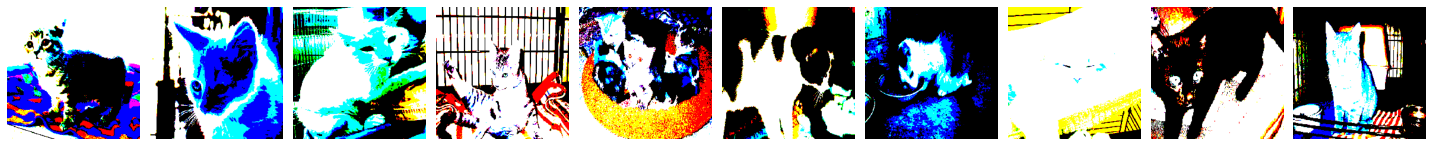

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
plotImages(test_imgs)

print(test_labels)

# <font color="yellow">__Step 3) Predicting On The Test Data__</font> 

In [15]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [18]:
# After running the predictions, we can print our the rounded predictions see what they look like
# These are the labels that the model is predicting for our images.
# np.round(predictions)

# <font color="yellow">__Step 5) Plotting Predictions With A Confusion Matrix__</font> 

In [20]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[31 19]
 [13 37]]


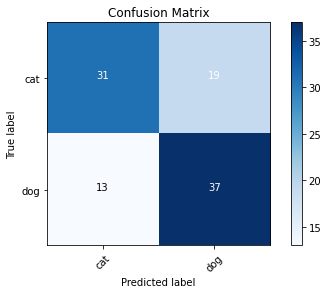

In [23]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')